In [1]:
import scipy.io as sio

# load data from the .mat file:
# mat_contents = sio.loadmat('EEG_big.mat') # (EEG_data.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN_1subj.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_noICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->0.5-38Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-48Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0101T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0202T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0403T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0503T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0801T_TD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_2TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ksenia2_long_chunked.mat') 


# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_fullspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_lowspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->1-38Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-100Hz,Env=1_FD')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-47Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD5_64_.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->2-30Hz,Env=1_TD5_64_.mat')

mat_contents = sio.loadmat(
    '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD1_94_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD101_192_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD197_289_.mat')


# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD1_289_.mat')


BATCH_SIZE = 20
SHUFFLE = True
TEST_TRAIN = 0.2

KERNEL_SIZE = ((1,100), (50,5), (5,5), (3,3), (3,3))

# N_KERNELS = (10,30,50,80,160)
N_KERNELS = (40,5,10,20,40)
POOL_SIZE = ((2,5),(2,5),(60,5),(2,2),(2,2))

DROPOUT = (0.1, 0.2, 0.3, 0.4, 0.8, 0.8)
DENSE_LEN = 10

In [2]:
# get the Dataset:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = mat_contents['X']
Y = mat_contents['Z']
    

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
print('Original data shape:', X.shape)
print('Original labels shape:', Y.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

# normalize to unit variance and zero mean:
# for i in range(x_train.shape[0]):
#     for j in range(x_train.shape[1]):
#         x_train[i,j,:] = preprocessing.scale(x_train[i,j,:])
# #         x_train[i,j,:] = preprocessing.MaxAbsScaler(x_train[i,j,:])

# for i in range(x_test.shape[0]):
#     for j in range(x_test.shape[1]):
#         x_test[i,j,:] = preprocessing.scale(x_test[i,j,:])
# #         x_test[i,j,:] = preprocessing.minmax_scale(x_test[i,j,:])

# ensure the tensors are sized right:
if len(X.shape)==3:
    x_train = np.expand_dims(x_train,3)
    x_test = np.expand_dims(x_test,3)
    

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

chan = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
leng = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test labels shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train labels shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

Original data shape: (450, 60, 500)
Original labels shape: (450, 1)
Original data type: float32
Normalized data type: float16
test input shape (90, 60, 500, 1) Nomralized MEAN: -0.022232 min -861.5 max 468.5
train input shape (360, 60, 500, 1) Nomralized MEAN: -0.018326 min -12984.0 max 13112.0
test labels shape (90, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (360, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [3]:
# we first define the autoencoder's architecture:

# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, ELU, Permute, Reshape
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers
from keras.initializers import Orthogonal as orth

import numpy as np
import matplotlib.pyplot as plt

def conv_net(leng):
    
    # input layer
    input_img = Input(shape=(chan, leng, streams))  # adapt this if using `channels_first` image
    
    # Layer 1
    input_norm = BatchNormalization()(input_img)
    e1c = Conv2D(N_KERNELS[0], KERNEL_SIZE[0], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None))(input_norm)
    e1t = Permute((3,2,1))(e1c)
    e1rs = Reshape((chan*N_KERNELS[0], leng, 1))(e1t)
#     e1act = ELU(alpha=1.0)(e1rs)
#     e1p = MaxPooling2D(POOL_SIZE[0], padding='same')(e1rs) # (e1act)


    # Layer 2
    e2b = BatchNormalization()(e1rs)
    e2d = Dropout(DROPOUT[0])(e2b)
    e2c = Conv2D(N_KERNELS[1], KERNEL_SIZE[1], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None))(e2d)
    e2act = ELU(alpha=1.0)(e2c)
    e2p = MaxPooling2D(POOL_SIZE[1], padding='same')(e2act)
    
    # Layer 3
    e3b = BatchNormalization()(e2p)
    e3d = Dropout(DROPOUT[1])(e2b)
    e3c = Conv2D(N_KERNELS[2], KERNEL_SIZE[2], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None))(e3d)
    e3act = ELU(alpha=1.0)(e3c)
    e3p = MaxPooling2D(POOL_SIZE[2], padding='same')(e3act)
    
    # Layer 4
    e4b = BatchNormalization()(e3p)
    e4d = Dropout(DROPOUT[2])(e4b)
    e4c = Conv2D(N_KERNELS[3], KERNEL_SIZE[3], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None))(e4d)
    e4act = ELU(alpha=1.0)(e4c)
    e4p = MaxPooling2D(POOL_SIZE[3], padding='same')(e4act)
    
    # Layer 5
    e5b = BatchNormalization()(e4p)
    e5d = Dropout(DROPOUT[3])(e4b)
    e5c = Conv2D(N_KERNELS[4], KERNEL_SIZE[4], padding='same',
                 kernel_initializer = orth(gain=1.0, seed=None))(e5d)
    e5act = ELU(alpha=1.0)(e5c)
    e5p = MaxPooling2D(POOL_SIZE[4], padding='same')(e5act)
    
    # Layer 6
    e6 = Flatten()(e4p)
    
    # Layer 7
    e7b = BatchNormalization()(e6)
    e7d = Dropout(DROPOUT[4])(e7b)
    e7c = Dense(DENSE_LEN, activation='sigmoid',
                kernel_initializer = orth(gain=1.0, seed=None))(e7d)

    # Layer 8
    e8b = BatchNormalization()(e7c)
    e8d = Dropout(DROPOUT[5])(e8b)
    e8c = Dense(2, activation='softmax')(e8d)

    return Model(input_img, e8c)

Using TensorFlow backend.


In [4]:
# define input to the model:
x = Input(shape=(chan, leng, streams))

# make the model:
model = conv_net(leng)

# compile the model:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.95, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss=correlation_coefficient_loss)
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


# SEE INSIDE THE MODEL:
# conv_net().summary() #or
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 60, 500, 1)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 500, 1)        4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 500, 40)       4040      
_________________________________________________________________
permute_1 (Permute)          (None, 40, 500, 60)       0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2400, 500, 1)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2400, 500, 1)      4         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2400, 500, 1)      0         
__________

In [5]:
# Training time!
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')
checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_2.h5',
                               verbose=1,
                               monitor='val_acc',
                               save_best_only=True)
TB = TensorBoard(log_dir='/home/amplifier/home/CNN_stim')

train_history = model.fit(x_train, y_train,
                epochs=1000,
                batch_size=BATCH_SIZE,
                verbose=2,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[TB, checkpointer, early_stopping])

# model.save('/home/amplifier/home/NEW_DL/models/EEGnet.h5')

Instructions for updating:
Use the retry module or similar alternatives.
Train on 360 samples, validate on 90 samples
Epoch 1/1000
 - 6s - loss: 1.4196 - acc: 0.4792 - val_loss: 0.7286 - val_acc: 0.5111

Epoch 00001: val_acc improved from -inf to 0.51111, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_2.h5
Epoch 2/1000
 - 3s - loss: 1.3458 - acc: 0.4556 - val_loss: 0.7040 - val_acc: 0.5000

Epoch 00002: val_acc did not improve
Epoch 3/1000
 - 3s - loss: 1.3383 - acc: 0.4694 - val_loss: 0.7230 - val_acc: 0.4667

Epoch 00003: val_acc did not improve
Epoch 4/1000
 - 3s - loss: 1.0990 - acc: 0.5250 - val_loss: 0.7355 - val_acc: 0.4667

Epoch 00004: val_acc did not improve
Epoch 5/1000
 - 3s - loss: 1.2059 - acc: 0.4944 - val_loss: 0.9940 - val_acc: 0.4778

Epoch 00005: val_acc did not improve
Epoch 6/1000
 - 3s - loss: 1.0811 - acc: 0.5194 - val_loss: 0.7720 - val_acc: 0.4667

Epoch 00006: val_acc did not improve
Epoch 7/1000
 - 3s - loss: 1.1084 - acc: 0.4694 - va


Epoch 00061: val_acc did not improve
Epoch 62/1000
 - 4s - loss: 0.6779 - acc: 0.5389 - val_loss: 0.6902 - val_acc: 0.5778

Epoch 00062: val_acc improved from 0.56667 to 0.57778, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_2.h5
Epoch 63/1000
 - 4s - loss: 0.6814 - acc: 0.5444 - val_loss: 0.6908 - val_acc: 0.5222

Epoch 00063: val_acc did not improve
Epoch 64/1000
 - 3s - loss: 0.6706 - acc: 0.6139 - val_loss: 0.6920 - val_acc: 0.5556

Epoch 00064: val_acc did not improve
Epoch 65/1000
 - 3s - loss: 0.6718 - acc: 0.6083 - val_loss: 0.6911 - val_acc: 0.5333

Epoch 00065: val_acc did not improve
Epoch 66/1000
 - 4s - loss: 0.6674 - acc: 0.6028 - val_loss: 0.6890 - val_acc: 0.5667

Epoch 00066: val_acc did not improve
Epoch 67/1000
 - 3s - loss: 0.6671 - acc: 0.6028 - val_loss: 0.6915 - val_acc: 0.5333

Epoch 00067: val_acc did not improve
Epoch 68/1000
 - 4s - loss: 0.6666 - acc: 0.5778 - val_loss: 0.6863 - val_acc: 0.5000

Epoch 00068: val_acc did not improve


Epoch 00125: val_acc did not improve
Epoch 126/1000
 - 3s - loss: 0.6479 - acc: 0.6306 - val_loss: 0.6767 - val_acc: 0.6000

Epoch 00126: val_acc did not improve
Epoch 127/1000
 - 4s - loss: 0.6453 - acc: 0.6028 - val_loss: 0.6832 - val_acc: 0.5667

Epoch 00127: val_acc did not improve
Epoch 128/1000
 - 3s - loss: 0.6468 - acc: 0.6306 - val_loss: 0.7379 - val_acc: 0.5222

Epoch 00128: val_acc did not improve
Epoch 129/1000
 - 4s - loss: 0.6540 - acc: 0.6250 - val_loss: 0.7077 - val_acc: 0.5333

Epoch 00129: val_acc did not improve
Epoch 130/1000
 - 4s - loss: 0.6377 - acc: 0.6333 - val_loss: 0.6668 - val_acc: 0.5778

Epoch 00130: val_acc did not improve
Epoch 131/1000
 - 4s - loss: 0.6387 - acc: 0.6306 - val_loss: 0.7069 - val_acc: 0.5444

Epoch 00131: val_acc did not improve
Epoch 132/1000
 - 4s - loss: 0.6337 - acc: 0.6806 - val_loss: 0.6750 - val_acc: 0.5778

Epoch 00132: val_acc did not improve
Epoch 133/1000
 - 3s - loss: 0.6337 - acc: 0.6528 - val_loss: 0.7510 - val_acc: 0.5111



Epoch 00190: val_acc did not improve
Epoch 191/1000
 - 4s - loss: 0.6265 - acc: 0.6833 - val_loss: 0.7504 - val_acc: 0.5222

Epoch 00191: val_acc did not improve
Epoch 192/1000
 - 3s - loss: 0.6449 - acc: 0.6111 - val_loss: 0.6925 - val_acc: 0.5444

Epoch 00192: val_acc did not improve
Epoch 193/1000
 - 4s - loss: 0.6270 - acc: 0.6444 - val_loss: 0.7023 - val_acc: 0.5556

Epoch 00193: val_acc did not improve
Epoch 194/1000
 - 4s - loss: 0.6112 - acc: 0.6778 - val_loss: 0.7697 - val_acc: 0.5222

Epoch 00194: val_acc did not improve
Epoch 195/1000
 - 3s - loss: 0.6218 - acc: 0.6556 - val_loss: 0.7482 - val_acc: 0.5222

Epoch 00195: val_acc did not improve
Epoch 196/1000
 - 4s - loss: 0.6354 - acc: 0.6306 - val_loss: 0.6758 - val_acc: 0.6000

Epoch 00196: val_acc did not improve
Epoch 197/1000
 - 4s - loss: 0.5798 - acc: 0.7083 - val_loss: 0.6970 - val_acc: 0.5667

Epoch 00197: val_acc did not improve
Epoch 198/1000
 - 3s - loss: 0.6093 - acc: 0.6500 - val_loss: 0.6871 - val_acc: 0.6000



Epoch 00256: val_acc did not improve
Epoch 257/1000
 - 3s - loss: 0.6038 - acc: 0.6667 - val_loss: 0.6954 - val_acc: 0.5889

Epoch 00257: val_acc did not improve
Epoch 258/1000
 - 3s - loss: 0.5963 - acc: 0.6667 - val_loss: 0.8508 - val_acc: 0.5111

Epoch 00258: val_acc did not improve
Epoch 259/1000
 - 4s - loss: 0.5737 - acc: 0.7333 - val_loss: 0.7911 - val_acc: 0.5444

Epoch 00259: val_acc did not improve
Epoch 260/1000
 - 3s - loss: 0.5850 - acc: 0.6861 - val_loss: 0.6851 - val_acc: 0.6000

Epoch 00260: val_acc did not improve
Epoch 261/1000
 - 3s - loss: 0.6305 - acc: 0.6667 - val_loss: 0.6619 - val_acc: 0.6111

Epoch 00261: val_acc did not improve
Epoch 262/1000
 - 4s - loss: 0.6065 - acc: 0.6806 - val_loss: 0.6906 - val_acc: 0.6111

Epoch 00262: val_acc did not improve
Epoch 263/1000
 - 3s - loss: 0.5789 - acc: 0.6944 - val_loss: 0.8218 - val_acc: 0.5222

Epoch 00263: val_acc did not improve
Epoch 264/1000
 - 4s - loss: 0.5849 - acc: 0.6806 - val_loss: 0.7017 - val_acc: 0.5889


In [6]:
# load the best model:
model.load_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_2.h5')

# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

(360, 2)
(90, 2)


[[38  8]
 [23 21]]


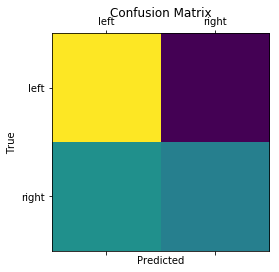

In [7]:
W = []
GT = []

for i in range(len(decoded_test)):
    if decoded_test[i][0]<decoded_test[i][1]:
        W.append('right')
    if decoded_test[i][0]>decoded_test[i][1]:
        W.append('left')

    if y_test[i][0]<y_test[i][1]:
        GT.append('right')
    if y_test[i][0]>y_test[i][1]:
        GT.append('left')
        
from sklearn.metrics import confusion_matrix
labels = ['left', 'right'] # 1 for right, 0 for left
cm = confusion_matrix(GT, W, labels)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.matshow(cm)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
print(cm)

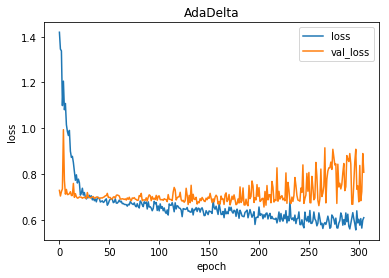

In [8]:
#####################################################

# print(np.array(history.losses))
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.title('AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [9]:
##########################################################

# now test sample by sample
cor_test = []
L = x_test.shape
for sample_no in range(x_test.shape[0]):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_test[sample_no,0] < y_test[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_test[sample_no,0] > y_test[sample_no,1]))):
        cor_test.append(1)
    else:
        cor_test.append(0)

cor_train = []
L = x_train.shape
for sample_no in range(x_train.shape[0]):
    pred = model.predict(np.expand_dims(x_train[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_train[sample_no,0] < y_train[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_train[sample_no,0] > y_train[sample_no,1]))):
        cor_train.append(1)
    else:
        cor_train.append(0)

# Report accuracies
print('Accuracy on the test data:', np.mean(cor_test))
print('Accuracy on the training data:', np.mean(cor_train))

Accuracy on the test data: 0.655555555556
Accuracy on the training data: 0.686111111111


In [69]:
# import csv   
# fields=['VERT2', 'MY04', np.mean(cor_test), np.mean(cor_train)]
# with open(r'/home/amplifier/home/NEW_DL/weights/document.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerow(fields)

In [70]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [71]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(pow(n, 0.5) + 1)) if n % i == 0)))

def sqfac(input):
    xx = list(factors(input))
    xx.sort()
    ind = []
    ind1 = int(len(xx)/2)-1
    ind.append(xx[ind1])
    ind.append(xx[ind1+1])
    ind.sort(reverse=True)
    return ind

Layer number: 2 Layer name: conv2d_41
(100, 40)


Text(0.5,0.98,'Convolution kernels in layer conv2d_41')

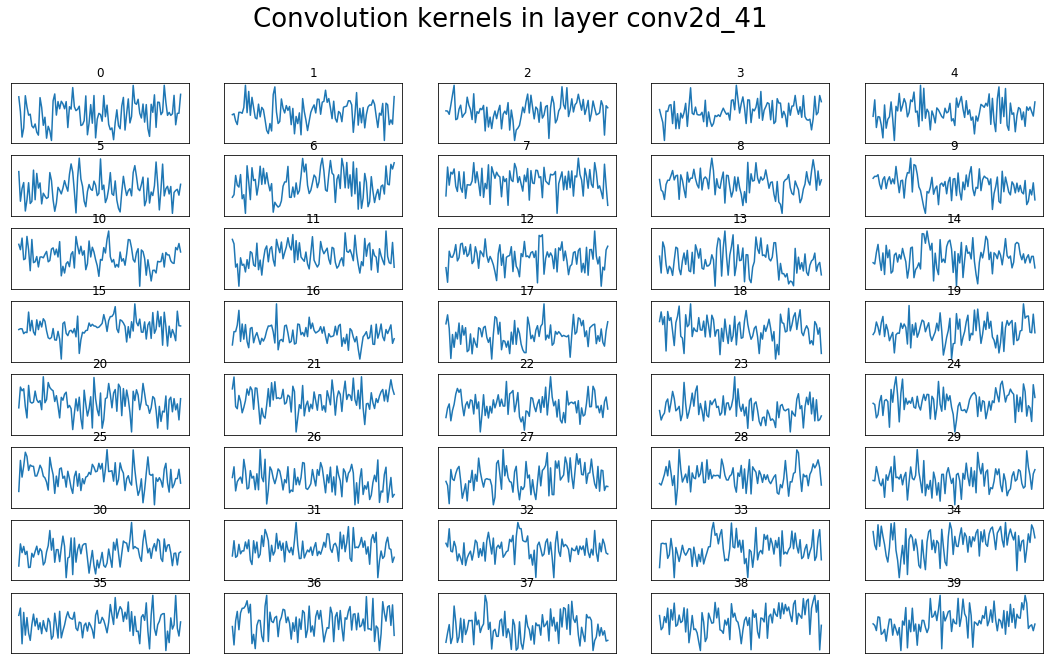

In [72]:
# Visualize a few kernels from the first convolutional layer:
# enc.layers[2].get_config()
# dir(enc.layers[2])
x = model.layers[2].get_weights()
print ('Layer number:', 2, 'Layer name:', model.layers[2].name)

sh = x[0].shape
x[0] = x[0].reshape(sh[1], sh[3])
print(x[0].shape) # kernel length x input channels x output channels

ind = sqfac(N_KERNELS[0])
I = ind[0]
J = ind[1]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].plot(x[0][:,c])
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(c))
        c = c + 1
plt.suptitle('Convolution kernels in layer ' + model.layers[2].name, fontsize=26)

(1, 100, 1, 40)
5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5,0.98,'FFT of kernels in layer conv2d_41')

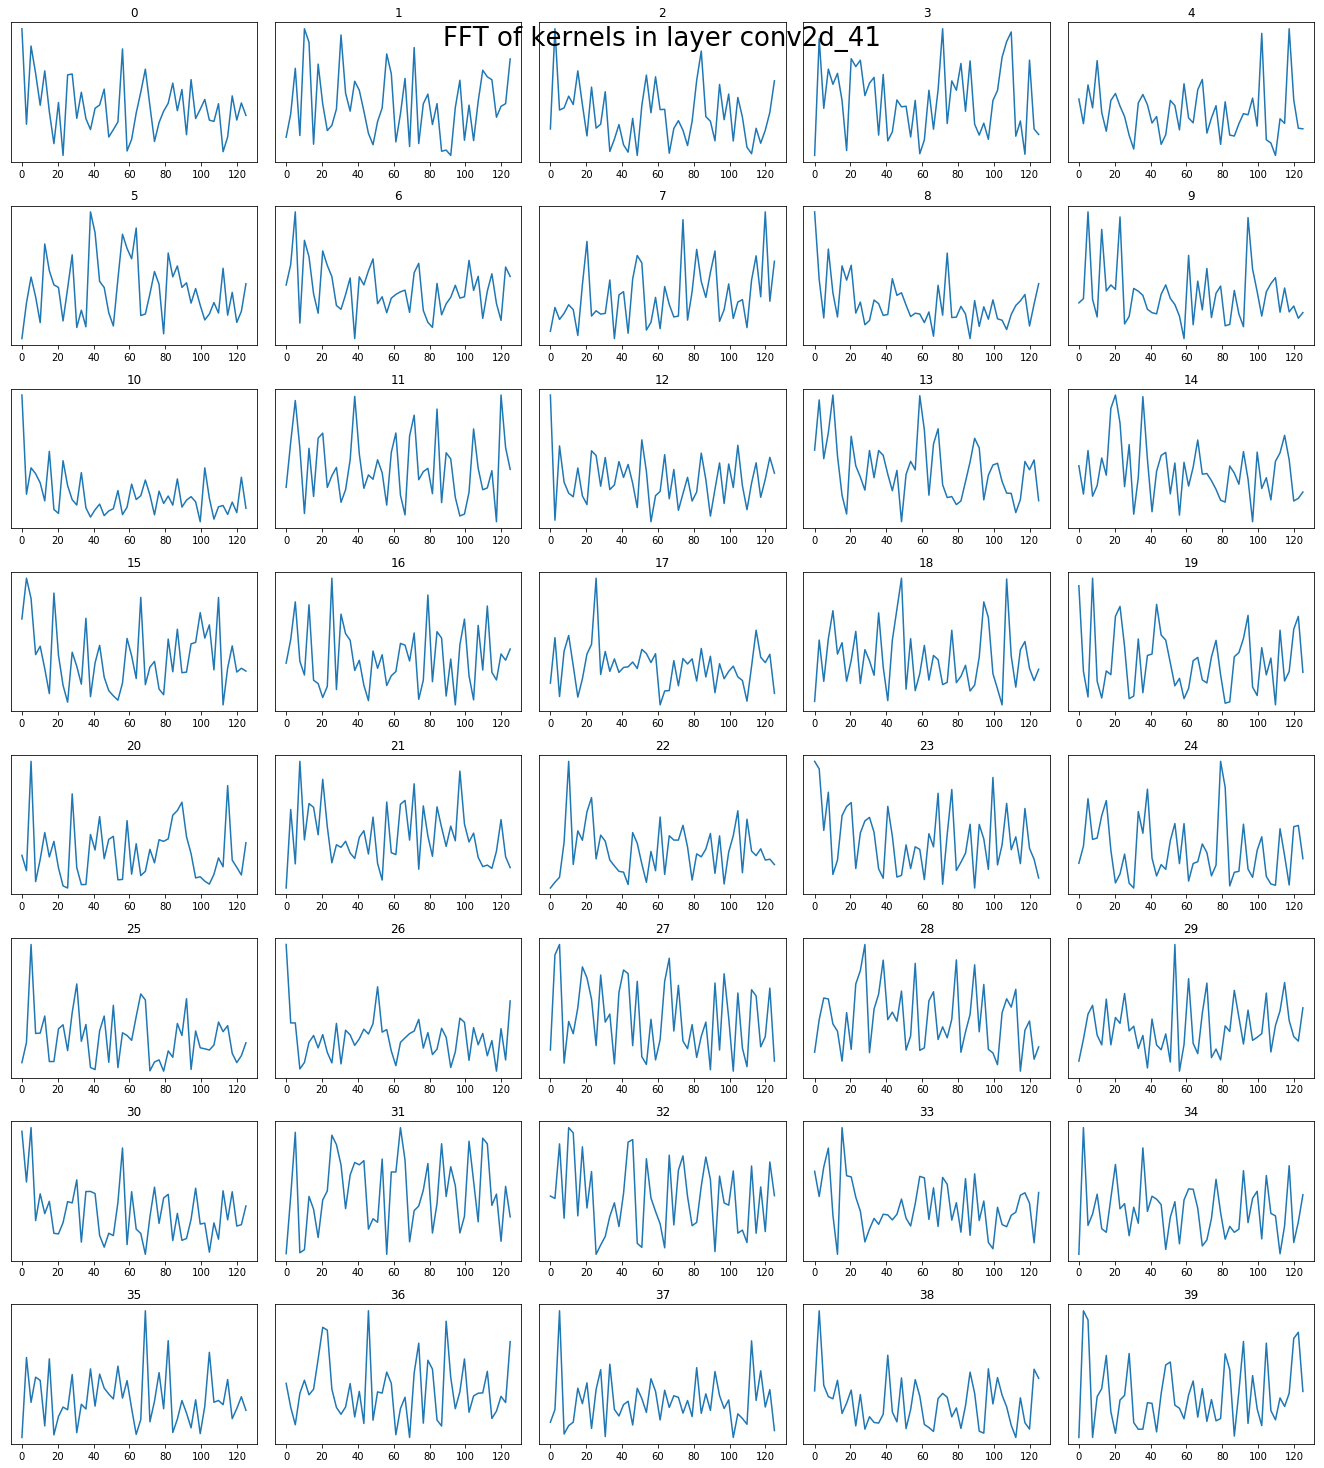

In [73]:
import scipy.fftpack

x = model.layers[2].get_weights()

ind = sqfac(N_KERNELS[0])
I = ind[0]
J = ind[1]

print(x[0].shape)
print(J)
c = 0

fs = 250
T = 1/fs * x[0].shape[0]
f = 50
t = np.arange(0,T, 1/fs)

fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 20.5)
axs = axs.ravel()

for i in range(I*J):
    y = x[0][:,:,:,c].reshape(100,1)
    yf = scipy.fftpack.fft(y, axis=0)
    YF = np.abs(yf)
    xf = np.linspace(0,fs/2, YF.shape[0]/2)
    YF_trunc = YF[0:int(len(YF)/2),-1]
    axs[c].plot(xf, YF_trunc)
    axs[c].get_xaxis().set_visible(True)
    axs[c].get_yaxis().set_visible(False)        
    axs[c].set_title(str(c))
    c = c + 1

plt.tight_layout()
plt.suptitle('FFT of kernels in layer ' + model.layers[2].name, fontsize=26)

Text(0.5,0.98,'Filters at the top level: Freq by time')

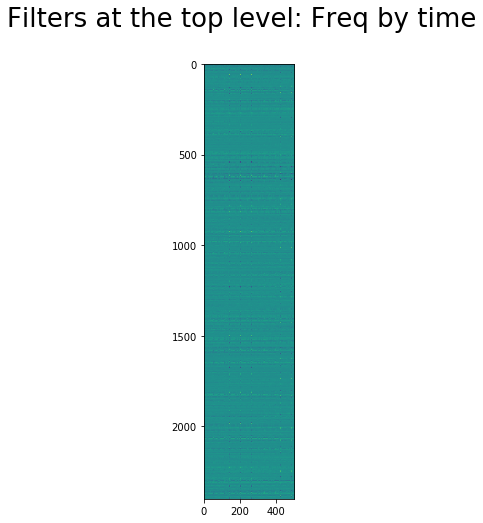

In [74]:
get_1st_conv_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layer_output = get_1st_conv_layer_output([np.expand_dims(x_train[3],0)])[0]

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.imshow(layer_output[-1,:,:,-1])

plt.suptitle('Filters at the top level: Freq by time', fontsize=26)